In [252]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv" # covid case source data
hillspop = 1471968 # population of hillsborough county florida for density calcs



In [254]:
df = pd.read_csv(url) # read in the csv from the NYT

In [255]:
df.head() # ensure that worked

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [256]:
df = df.iloc[12500:] # clear out the early data with little relevance for hills. county

In [257]:
df_florida = df.loc[df['state'] == 'Florida'] # filter down to just Florida

In [258]:
df_hills  = df_florida.loc[df['county'] == 'Hillsborough'] # filter down to just Hillsborough County

In [259]:
# the dataset has cumulative cases
# we want daily new cases, so create real_cases with just the daily number

df_hills['real_cases'] = df_hills.iloc[:,4].diff()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [260]:
df_hills.tail() # how's it looking?

,date,county,state,fips,cases,deaths,real_cases
784559,2020-12-01,Hillsborough,Florida,12057.0,58749,933.0,456.0
787803,2020-12-02,Hillsborough,Florida,12057.0,59270,938.0,521.0
791049,2020-12-03,Hillsborough,Florida,12057.0,59809,947.0,539.0
794295,2020-12-04,Hillsborough,Florida,12057.0,60241,955.0,432.0
797540,2020-12-05,Hillsborough,Florida,12057.0,60761,959.0,520.0


In [261]:
# to get active cases, we need to make an assumption for how long a person is infected
# for this, 2 weeks was assumed the infected period
# so, a rolling 2 week sum will provide something like an active case count

df_hills['2wk_case_sum'] = df_hills.iloc[:,6].rolling(window=14).sum()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [264]:
df_hills['pop'] = hillspop # add in the population of Hillsborough County

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [265]:
df_hills.tail() # how's it look?

,date,county,state,fips,cases,deaths,real_cases,2wk_case_sum,pop
784559,2020-12-01,Hillsborough,Florida,12057.0,58749,933.0,456.0,5317.0,1471968
787803,2020-12-02,Hillsborough,Florida,12057.0,59270,938.0,521.0,5370.0,1471968
791049,2020-12-03,Hillsborough,Florida,12057.0,59809,947.0,539.0,5483.0,1471968
794295,2020-12-04,Hillsborough,Florida,12057.0,60241,955.0,432.0,5449.0,1471968
797540,2020-12-05,Hillsborough,Florida,12057.0,60761,959.0,520.0,5504.0,1471968


In [266]:
df_hills['case_rate'] = (df_hills['2wk_case_sum']/df_hills['pop']) # create a case rate field

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [267]:
# percentages can by difficult for people to really conceptualize
# here, a field is created to describe the odds instead i.e. 1 in every 150 people are currently infected

df_hills['case_odds'] = (1/df_hills['case_rate']).round()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [268]:
df_hills.tail()

,date,county,state,fips,cases,deaths,real_cases,2wk_case_sum,pop,case_rate,case_odds
784559,2020-12-01,Hillsborough,Florida,12057.0,58749,933.0,456.0,5317.0,1471968,0.003612,277.0
787803,2020-12-02,Hillsborough,Florida,12057.0,59270,938.0,521.0,5370.0,1471968,0.003648,274.0
791049,2020-12-03,Hillsborough,Florida,12057.0,59809,947.0,539.0,5483.0,1471968,0.003725,268.0
794295,2020-12-04,Hillsborough,Florida,12057.0,60241,955.0,432.0,5449.0,1471968,0.003702,270.0
797540,2020-12-05,Hillsborough,Florida,12057.0,60761,959.0,520.0,5504.0,1471968,0.003739,267.0


In [269]:
covid_odds_plot = df_hills.iloc[75:,[0,10]] # slim down the set

In [232]:
covid_odds_plot

,date,case_odds
221858,2020-06-09,1543.0
224955,2020-06-10,1426.0
228058,2020-06-11,1274.0
231163,2020-06-12,1201.0
234270,2020-06-13,1071.0
...,...,...
778069,2020-11-29,284.0
781316,2020-11-30,288.0
784562,2020-12-01,277.0
787807,2020-12-02,274.0


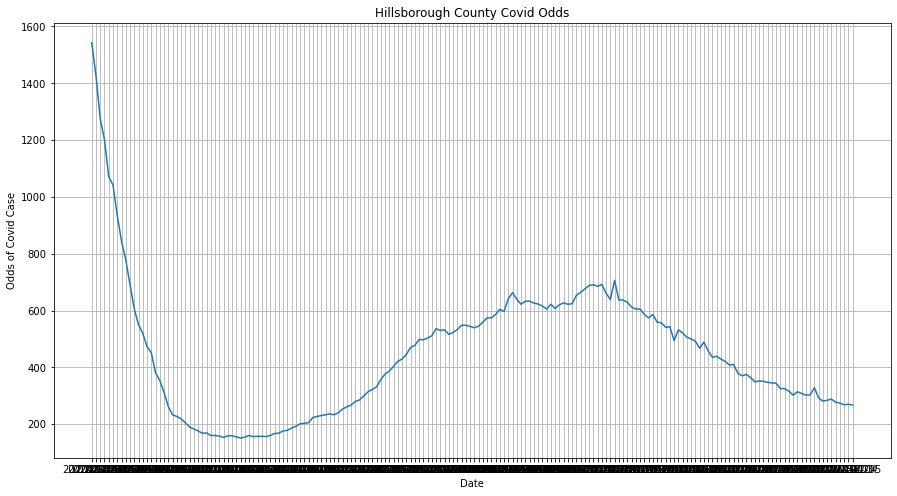

In [270]:
# Plot
x = covid_odds_plot.iloc[:,0]
y = covid_odds_plot.iloc[:,1]

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x, y)


ax.set(xlabel='Date', ylabel='Odds of Covid Case',
       title='Hillsborough County Covid Odds')
ax.grid()

fig.savefig("test.png")
plt.show()


In [248]:
# define some key statistics

data_current_through = covid_odds_plot.date.max()
worst_odds = covid_odds_plot.case_odds.min()
worst_odds_date = 'a'
current_odds = 'b'

In [271]:
# start laying out the story

print('data current through ',data_current_through)
print('worst odds so far ',worst_odds)


data current through  2020-12-03
worst odds so far  151.0
